# Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data. 

## Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some **text mining**. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Data Science from Wikipedia:

In [32]:
url = 'https://en.wikipedia.org/api/rest_v1/page/html/Software_testing'
USER_AGENT = (
    "DataSciencePlayground/1.0 "
)

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [33]:
import requests

text = requests.get(url, headers={"User-Agent": USER_AGENT},).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html prefix="dc: http://purl.org/dc/terms/ mw: http://mediawiki.org/rdf/" about="https://en.wikipedia.org/wiki/Special:Redirect/revision/1322303753"><head prefix="mwr: https://en.wikipedia.org/wiki/Special:Redirect/"><meta charset="utf-8"/><meta property="mw:pageId" content="29090"/><meta property="mw:pageNamespace" content="0"/><link rel="dc:replaces" resource="mwr:revision/1322303107"/><meta property="mw:revisionSHA1" content="e96d8a34e6545f5be356bb9d67ccf4f40a0e62cc"/><meta property="dc:modified" content="2025-11-15T13:54:15.000Z"/><meta property="mw:htmlVersion" content="2.8.0"/><meta property="mw:html:version" content="2.8.0"/><link rel="dc:isVersionOf" href="//en.wikipedia.org/wiki/Software_testing"/><base href="//en.wikipedia.org/wiki/"/><title>Software testing</title><meta property="mw:generalModules" content="ext.pygments.view|ext.cite.ux-enhancements|mediawiki.page.media"/><meta property="mw:moduleStyles" content="ext.pygments|ext.cite.parsoid.styles|ext.cite

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [34]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Software testing Checking software against a standard Part of a series on Software development Core activities Data modeling Processes Requirements Design Construction Engineering Testing Debugging Deployment Maintenance Paradigms and models Agile Cleanroom Incremental Prototyping Spiral V model Waterfall Methodologies  and frameworks ASD DAD DevOps DSDM FDD IID Kanban Lean SD LeSS MDD MSF PSP RAD RUP SAFe Scrum SEMAT TDD TSP UP XP Supporting disciplines Configuration management Deployment management Documentation Project management Quality assurance User experience Practices ATDD BDD CCO CD CI DDD PP SBE Stand-up TDD Tools Build automation Compiler Debugger GUI builder IDE Infrastructure as code Profiler Release automation UML Modeling Standards and bodies of knowledge CMMI IEEE standards IREB ISO 9001 ISO/IEC standards ITIL OMG PMBOK SWEBOK Glossaries Artificial intelligence Computer science Electrical and electronics engineering Outlines Software development C programming language 

## Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present: 

In [9]:
import sys
!{sys.executable} -m pip install nlp_rake

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 29.7 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.0/799.0 kB 29.1 MB/s  0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993332 sha256=4adc69d51d0b482698eaeddbfda214eb5d52aa7ea4d282e1057b375e2508f38e
  Stored in directory: /home/vscode/.cache/pip/wheels/13/60/5a/f2012969b3f7413b62b7b7063d6c9b45c93004a978cbe8ea2f
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [nlp_rake]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [35]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=2,min_chars=5)
res = extractor.apply(text)
res

[('dead code', 4.0),
 ('code coverage', 4.0),
 ('test automation', 4.0),
 ('test data', 4.0),
 ('test designer', 4.0),
 ('test suite', 4.0),
 ('test case', 4.0),
 ('unintended consequence', 4.0),
 ('user stories', 4.0),
 ('test planning', 4.0),
 ('test plan', 4.0),
 ('lessons learned', 4.0),
 ('prerequisite states', 4.0),
 ('test script', 4.0),
 ('test fixture', 4.0),
 ('test harness', 4.0),
 ('test run', 4.0),
 ('relative expense', 4.0),
 ('2nd ed', 4.0),
 ('↑ kaner', 4.0),
 ('↑ kolawa', 4.0),
 ('↑ bourque', 4.0),
 ('↑ lee', 4.0),
 ('wayback machine', 4.0),
 ('↑ petrenko', 4.0),
 ('↑ mathur', 4.0),
 ('3rd ed', 4.0),
 ('crc press', 4.0),
 ('↑ auerbach', 4.0),
 ('techwell insights', 4.0),
 ('techwell corp', 4.0),
 ('isbn 978-0-470-04212-0', 3.9318181818181817),
 ('isbn 978-0-7695-5166-1', 3.9318181818181817),
 ('isbn 978-0-8155-1363-6', 3.9318181818181817),
 ('isbn 978-1-4398-3436-7', 3.9318181818181817),
 ('waterfall development', 3.909090909090909),
 ('development team', 3.90909090909


We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

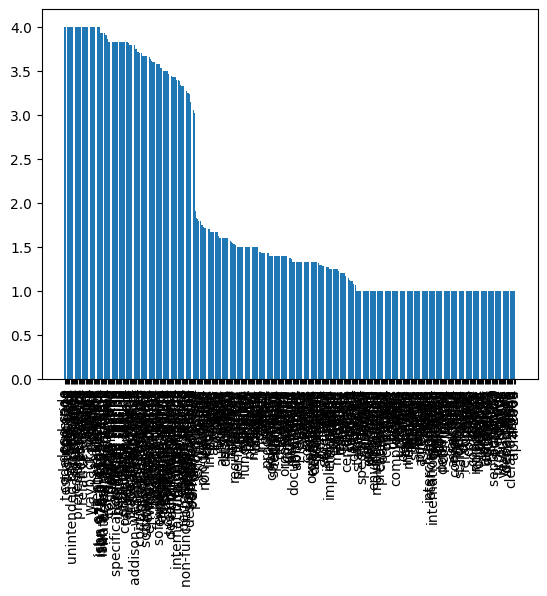

In [36]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [12]:
!{sys.executable} -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 30.5 MB/s  0:00:00 eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.4-cp314-cp314-linux_aarch64.whl size=533628 sha256=2850f510157aaf2517fed5e04465987de00984c2a3326ee1b6de68fd0230642e
  Stored in directory: /home/vscode/.cache/pip/wheels/38/3b/19/154b2215b636aee485efaa8be305a2d22b0a1707516894200c
Successfully built wordcloud

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

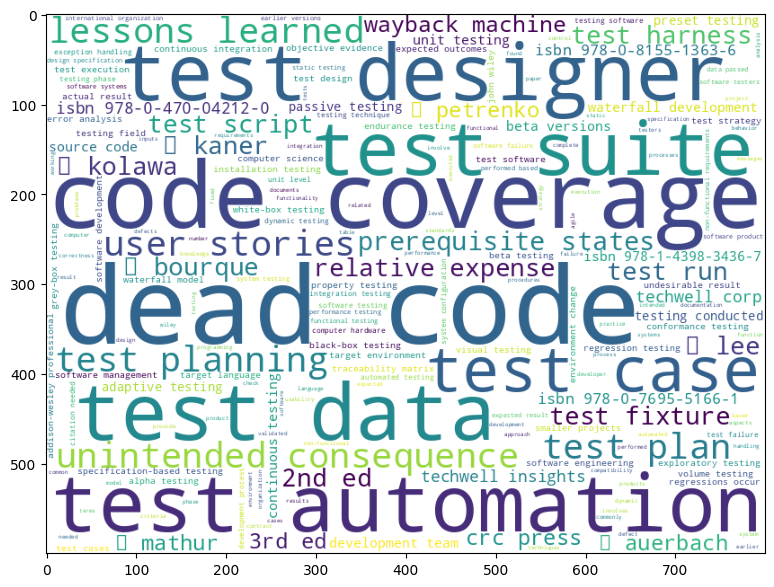

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

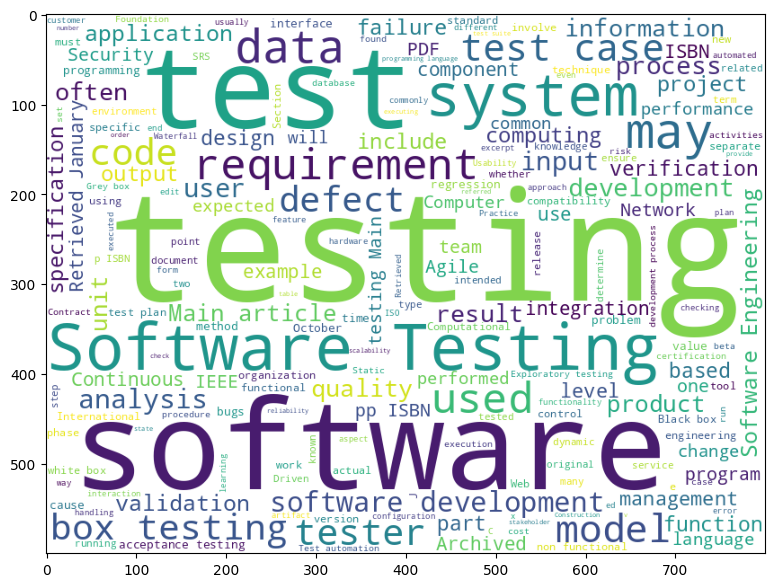

In [38]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as `Retrieved on`). Also, we get fewer keywords that consist of two words, such as *data scientist*, or *computer science*. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.

In our course we will discuss all those steps in detail. 